# Project - Applied Statistics


## 1. Import the necessary libraries

In [1]:
# Importing the Pandas library for accessing the functionality related  to pandas
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

## 2. Read the data as a data frame

In [2]:
#syntax: pd.read_csv('file_location/file_name.csv')
insurance_data = pd.read_csv('/Users/shivji/ML/StatsAssignment/insurance.csv')
#Print the first 5 rows in data frame
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Perform basic EDA which should include the following and print out your insights at every step.

### a. Shape of the data

In [3]:
# Print the number of Rows and Columns in the data frame
insurance_data.shape

(1338, 7)

### b. Data type of each attribute

In [4]:
# Print the Data type of Each Column
# First way 
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Second way
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### c. Checking the presence of missing values

In [15]:
# Check if the data frame has any null/missing value , then print the sum of null values in each column### 
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### d. 5 point summary of numerical attributes

In [16]:
#The five-number summary involves the calculation of 5 summary statistical quantities: namely:

#Minimum: The smallest observation in the sample.
#1st Quartile: The 25th percentile.
#Median: The middle value in the sample, also called the 50th percentile or the 2nd quartile.
#3rd Quartile: The 75th percentile.
#Maximum: The largest observation in the sample.

#First Method using direct describe method from pandas library, this prints the 5 Number summmary along 
# with the Mean, standard deviation and total number of counts

insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [35]:
# Second Method Using The Numpy Functions

from pandas.api.types import is_numeric_dtype
# Loop through each column in pandas 
for column in insurance_data:
    #Filter the columns which are integerg type
    if(is_numeric_dtype(insurance_data[column])):
        #get 3 quratiles of function
        quartiles = np.percentile(insurance_data[column], [25, 50, 75])
        min_value = insurance_data[column].min()
        max_value = insurance_data[column].max()
        # print 5-number summary for each column
        print("Column Name" , column)
        print('\t Min: %.3f' % min_value)
        print('\t Q1: %.3f' % quartiles[0])
        print('\t Median: %.3f' % quartiles[1])
        print('\t Q3: %.3f' % quartiles[2])
        print('\t Max: %.3f' % max_value)

Column Name age
	 Min: 18.000
	 Q1: 27.000
	 Median: 39.000
	 Q3: 51.000
	 Max: 64.000
Column Name bmi
	 Min: 15.960
	 Q1: 26.296
	 Median: 30.400
	 Q3: 34.694
	 Max: 53.130
Column Name children
	 Min: 0.000
	 Q1: 0.000
	 Median: 1.000
	 Q3: 2.000
	 Max: 5.000
Column Name charges
	 Min: 1121.874
	 Q1: 4740.287
	 Median: 9382.033
	 Q3: 16639.913
	 Max: 63770.428


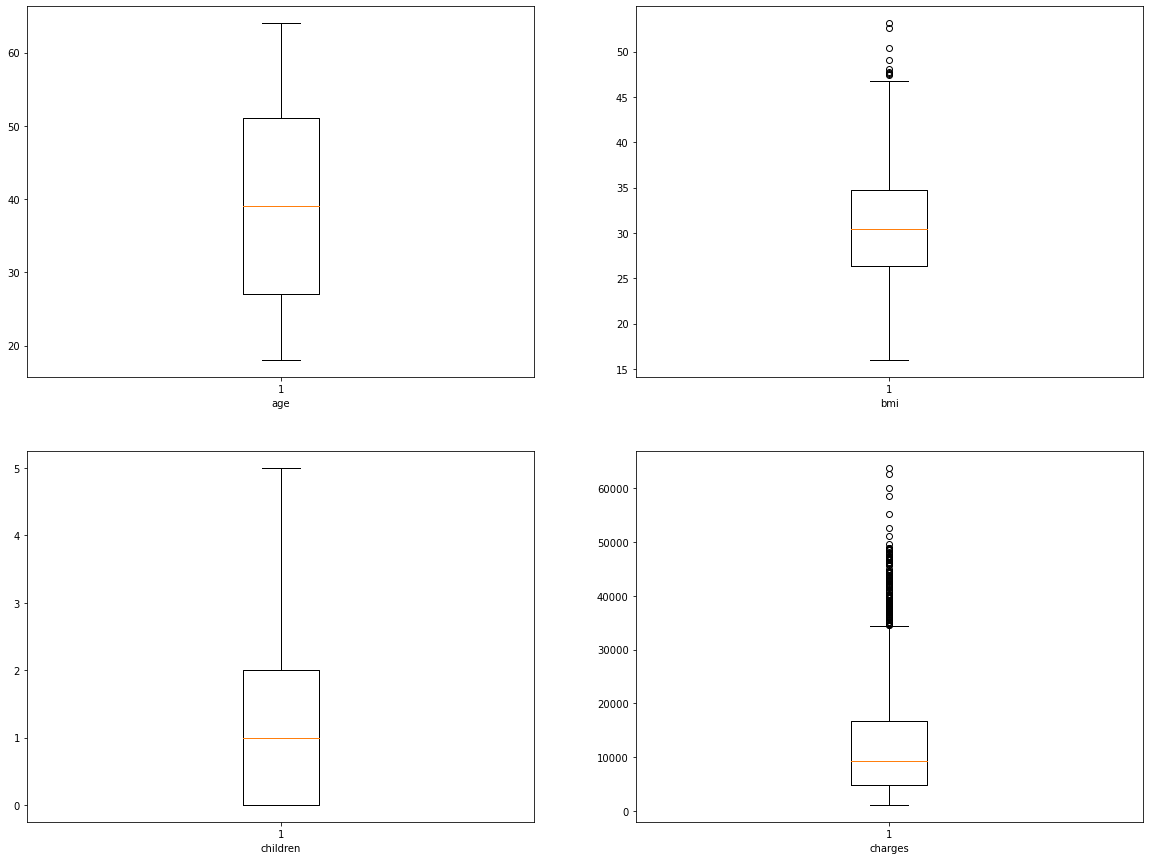

In [66]:
#Graphical representation of 5 point summary using Matplotlib pyplot
plt.figure(figsize= (20,15))
counter=0
column_number=0
for column in insurance_data:
    #Filter the columns which are integer type
    if(is_numeric_dtype(insurance_data[column])):
        counter = counter+1
        plt.subplot(2,2,counter)
        plt.boxplot(insurance_data[column])
        plt.xlabel(insurance_data.columns.values[column_number])
    column_number=column_number+1


plt.show()
        

### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb181b1b490>,
      dtype=object)

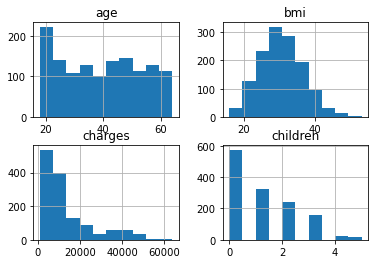

In [40]:
# First Method Directly using the histogram function , 
#this plots all the columns like the below graph has an extra graph of children

'''
bmi (Normal Distribution) : BMI Score of individuals is normally distributed .ie 
        the People have BMI Score highest at center with median value of 30

age (Uniform /T Distribution) : Age of the primary beneficiary's is uniformally distributed .ie
       Insurance companies have customers belong different age group and there 
       is equal participation from all age groups

charges(F Distribution) :Charges are left skewed ie most of the charges billed by the insurance company are low price value
'''


median=insurance_data.median()
print(median)
insurance_data.hist()

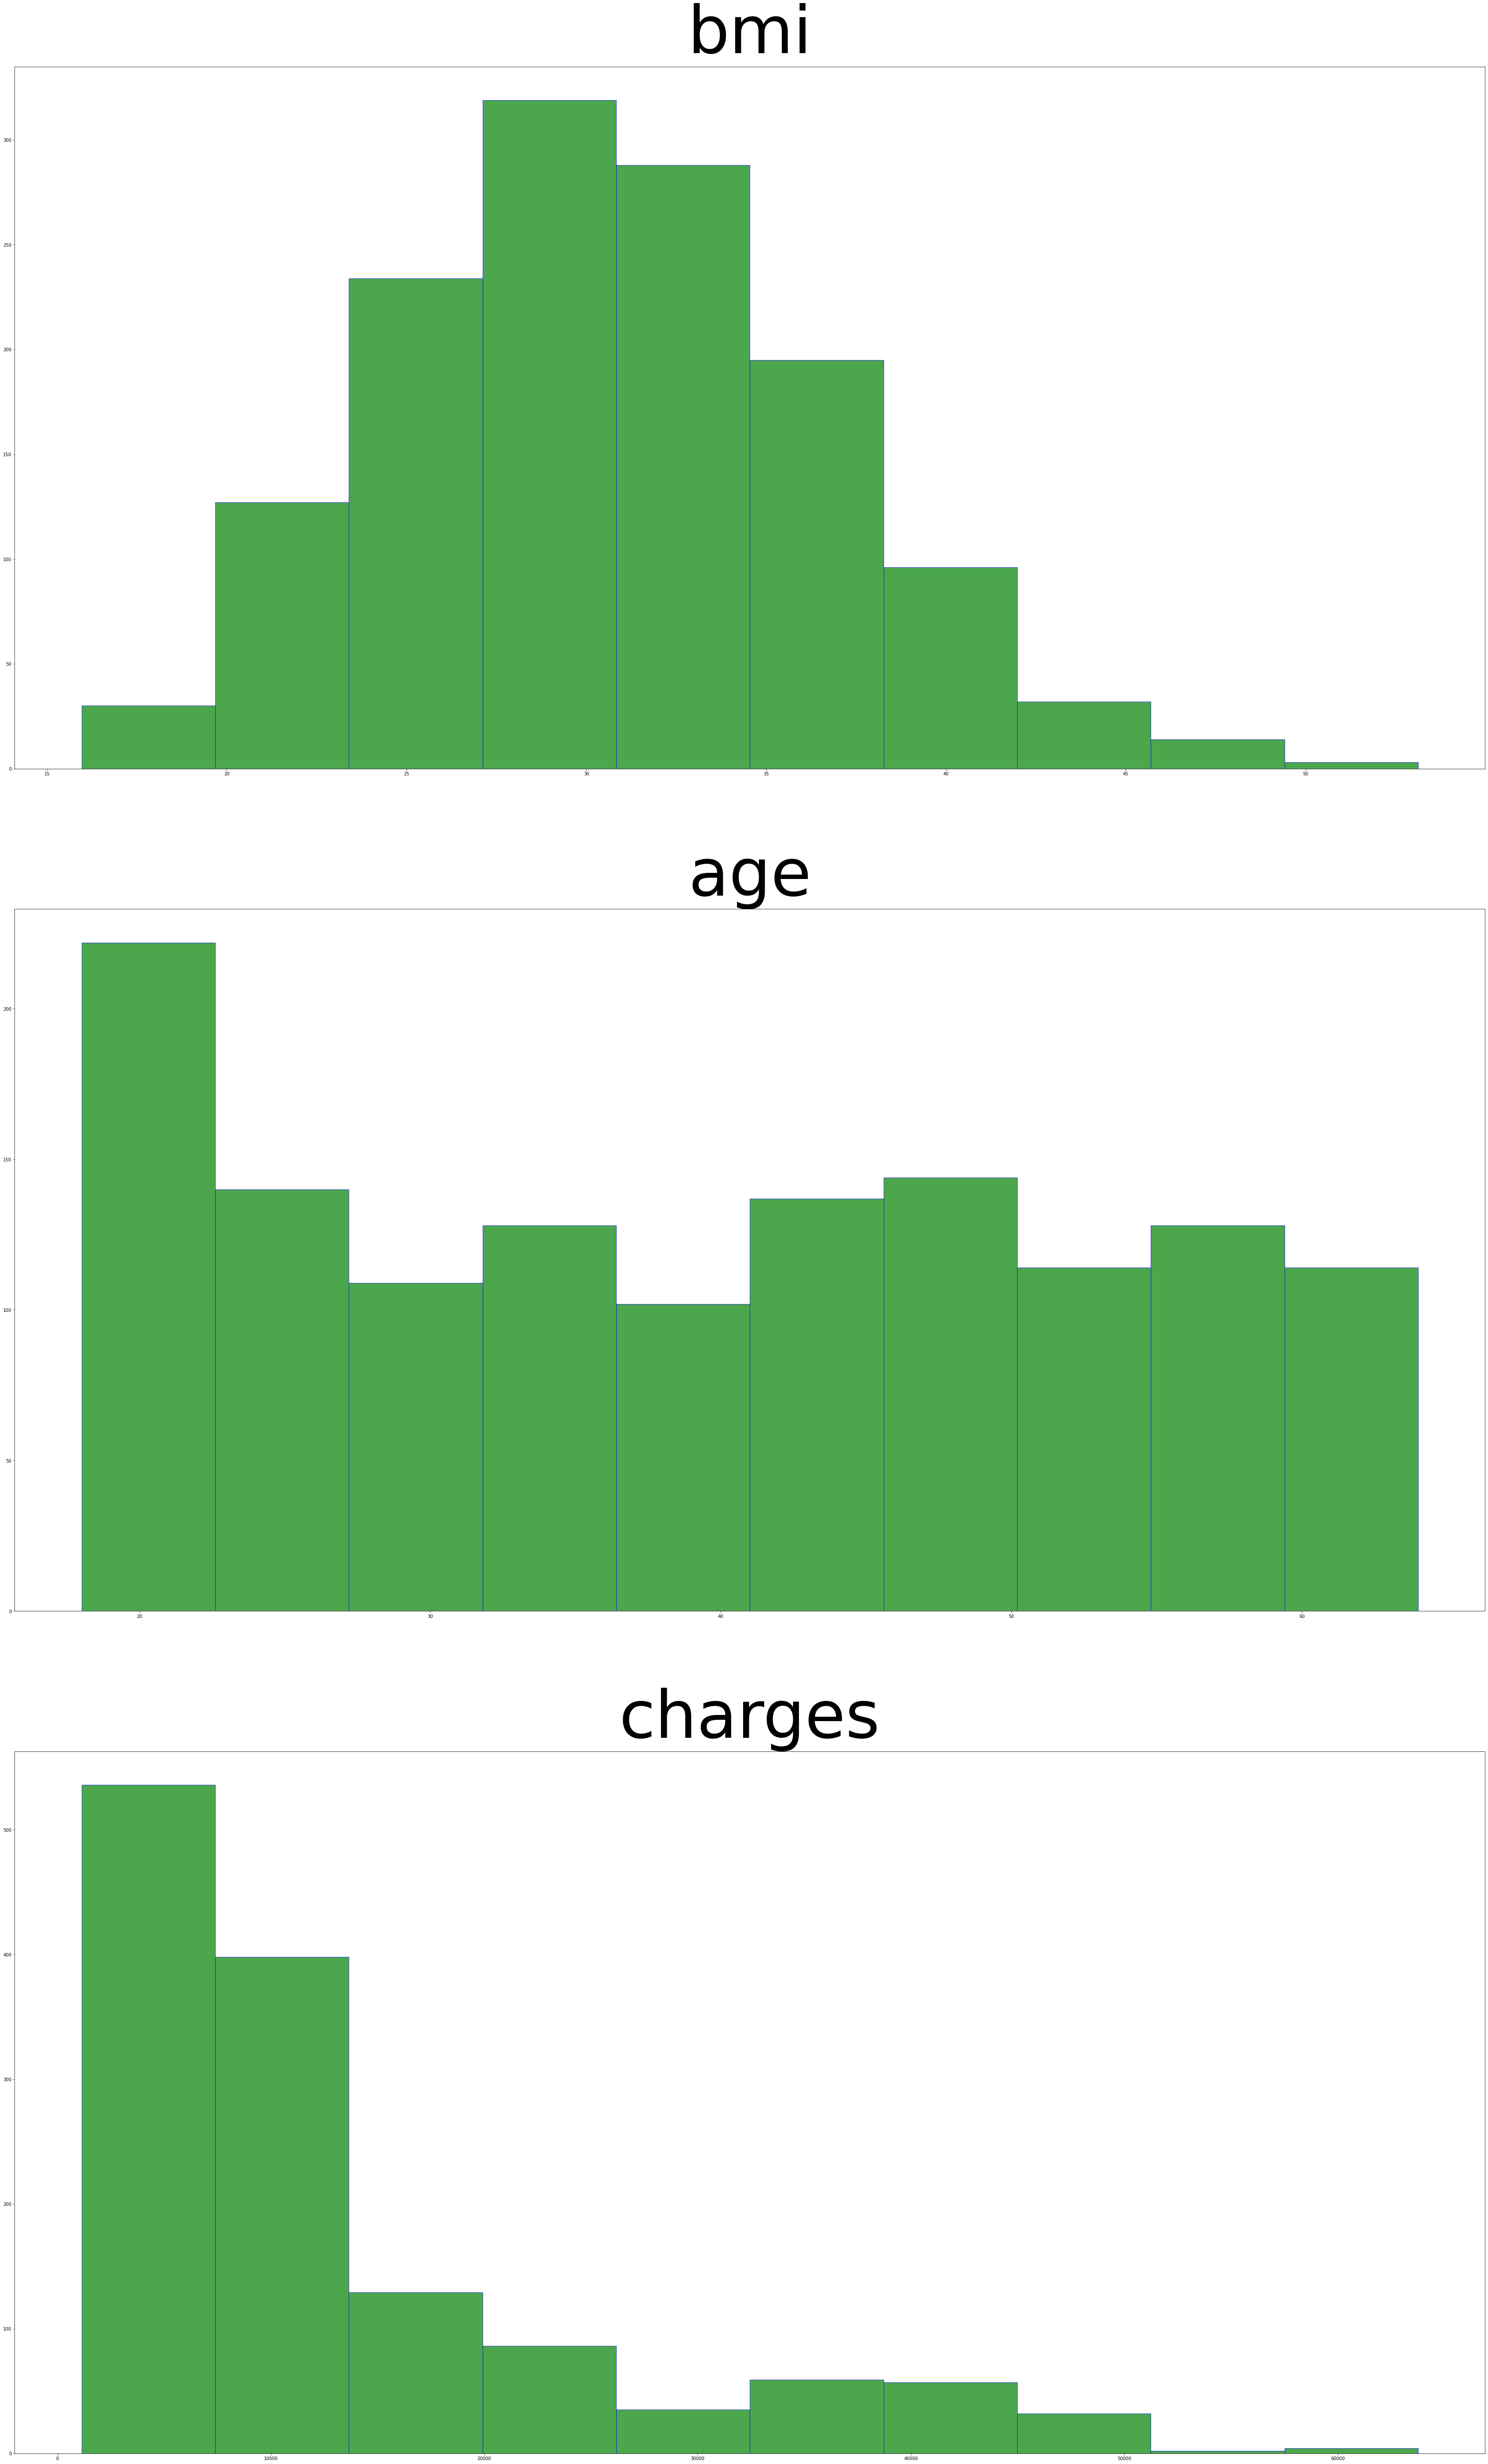

In [83]:
# Second Method  using the matplotlib pyplot , 

'''
bmi (Normal Distribution) : BMI Score of individuals is normally distributed .ie 
        the People have BMI Score highest at center with median value of 30

age (Uniform /T Distribution) : Age of the primary beneficiary's is uniformally distributed .ie
       Insurance companies have customers belong different age group and there 
       is equal participation from all age groups

charges(F Distribution) :Charges are left skewed ie most of the charges billed by the insurance company are low price value
'''
plt.figure(figsize= (60,100))
def plot_histogram(column_names):
    for i in range(len(column_names)):
        plt.subplot(3,1,i+1)
        plt.hist(insurance_data[column_names[i]], color='green', edgecolor = 'blue', alpha = 0.7)
        plt.title(column_names[i],fontdict = {'fontsize' : 150 })
    plt.show()
column_names = ['bmi','age','charges']
plot_histogram(column_names)

### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [86]:
#Display skewness of columns
skewness = pd.DataFrame({'skewness' : [stats.skew(insurance_data.bmi),
                                       stats.skew(insurance_data.age),stats.skew(insurance_data.charges)]},
                        index=['bmi','age','charges'])  
skewness

,skewness
bmi,0.283729
age,0.055610
charges,1.514180


### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

In [95]:
#There are various ways were outliers can be detected 
# scatter Plot , Box Plot , Z Score , IQR 

#Finding outliers using Z_score

#Formula for Z Score 
# Z_Score = Observation - Mean/ Standard Deviation 



def detect_outliers(data):
    outliers =[]
    thresold = 3
    mean = np.mean(data)
    standard_deviation =np.std(data)
    
    for observation in data:
        z_score = (observation-mean)/standard_deviation
        if z_score > thresold:
            outliers.append(observation)

    return outliers

def get_outliers(df):
    counter =0
    for column in df:
        if is_numeric_dtype(df[column]):
            outliers=detect_outliers(df[column])
            print("Column",column)
            print("\tSize",len(outliers))
            print("\t", outliers)

get_outliers(insurance_data)

Column age
	Size 0
	 []
Column bmi
	Size 4
	 [49.06, 50.38, 52.58, 53.13]
Column children
	Size 18
	 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Column charges
	Size 7
	 [51194.55914, 63770.42801, 58571.074479999996, 55135.402089999996, 52590.82939, 60021.39897, 62592.87309]


In [97]:
#Finding outliers using IQR

# Arrange the data in increasing order
# Calculate the 1st quartile and 3rd quartile
# Calcalate IQR q3-q1
# Find the lower bound q1*1.5 and uppper bound q1*1.5
# Anything which is outside this range is an outlier

def detect_outliers_iqr(dataset):
    outliers=[]
    q1,q3 = np.percentile(dataset,[25,75])
    iqr_value = q3-q1
    lower_bound_value= q1-(1.5*q1)
    upper_bound_value= q3+(1.5*q3)
    for data in dataset:
        if data < lower_bound_value or data > upper_bound_value:
            outliers.append(data)
    return outliers


def get_outliers_iqr(df):
    counter =0
    for column in df:
        if is_numeric_dtype(df[column]):
            outliers=detect_outliers_iqr(df[column])
            print("Column",column)
            print("\tSize",len(outliers))
            print("\t", outliers) 

get_outliers_iqr(insurance_data)

Column age
	Size 0
	 []
Column bmi
	Size 0
	 []
Column children
	Size 0
	 []
Column charges
	Size 67
	 [51194.55914, 48173.361, 47496.49445, 43578.9394, 47291.055, 47055.5321, 48824.45, 43753.33705, 47305.305, 44260.7499, 43921.1837, 46151.1245, 42856.837999999996, 48549.17835, 47896.79135, 42112.2356, 42124.5153, 42760.5022, 47928.03, 48517.56315, 41919.097, 42303.69215, 46889.2612, 46599.1084, 48885.135610000005, 48675.5177, 63770.42801, 45863.205, 45702.02235, 58571.074479999996, 43943.8761, 42969.8527, 42983.4585, 42560.4304, 45710.20785, 46200.9851, 46130.5265, 44400.4064, 44585.45587, 43254.41795, 55135.402089999996, 43813.8661, 45008.9555, 42111.6647, 46113.511, 46255.1125, 44202.6536, 48673.5588, 47462.894, 41999.52, 42211.1382, 44423.803, 44501.3982, 48970.2476, 41676.0811, 44641.1974, 41949.2441, 46661.4424, 52590.82939, 41661.602, 60021.39897, 47269.85400000001, 49577.6624, 47403.88, 62592.87309, 46718.16325, 43896.3763]


### h. Distribution of categorical columns (include children)

In [104]:
# Since there was no specific thing asked to calculate plotting various distributions 

#Counting the distributions of data based on the people who are smoker categorical data

insurance_data.groupby('smoker').count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


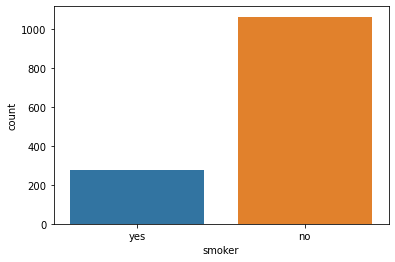

In [130]:
#Plotting the using count plot
sns.countplot(insurance_data['smoker'])

In [106]:
#Counting the distributions of data based on children categorical data
insurance_data.groupby('children').count()

,age,sex,bmi,smoker,region,charges
children,,,,,,
0,574,574,574,574,574,574
1,324,324,324,324,324,324
2,240,240,240,240,240,240
3,157,157,157,157,157,157
4,25,25,25,25,25,25
5,18,18,18,18,18,18


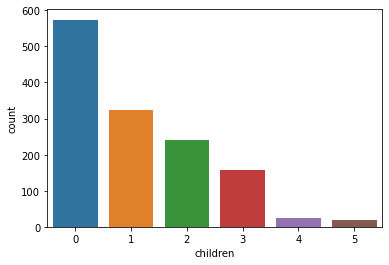

In [128]:
#Plotting the using count plot
sns.countplot(insurance_data['children'])

In [107]:
#Counting the distributions of data based on region categorical data
insurance_data.groupby('region').count()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


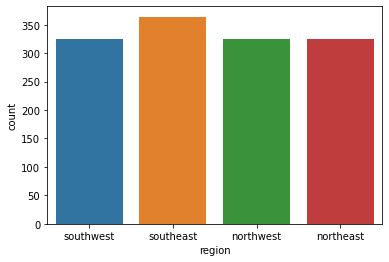

In [132]:
#Plotting the using count plot
sns.countplot(insurance_data['region'])

In [108]:
#Counting the distributions of data based on sex categorical data
insurance_data.groupby('sex').count()

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,662,662,662,662,662,662
male,676,676,676,676,676,676


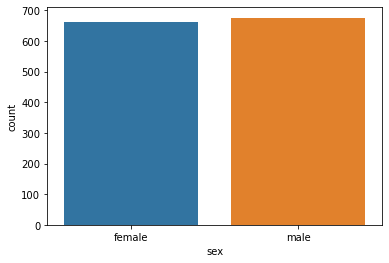

In [129]:
#Plotting the using count plot
sns.countplot(insurance_data['sex'])

In [109]:
#Counting the distributions of data based on all categorical data
insurance_data.groupby(['sex','region','children','smoker']).count()

age  bmi  charges
sex    region    children smoker                   
female northeast 0        no       65   65       65
                          yes       7    7        7
                 1        no       27   27       27
                          yes      12   12       12
                 2        no       24   24       24
...                               ...  ...      ...
male   southwest 3        no       15   15       15
                          yes       5    5        5
                 4        no        2    2        2
                          yes       2    2        2
                 5        no        4    4        4

[80 rows x 3 columns]

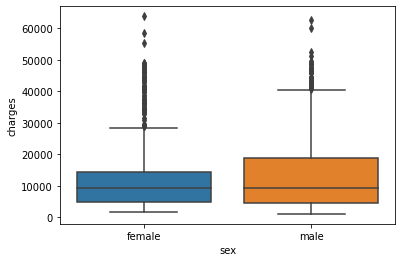

In [99]:
sns.boxplot(x='sex', y='charges', data= insurance_data)

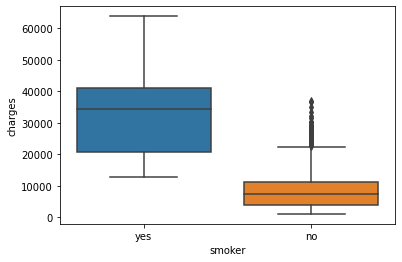

In [101]:
sns.boxplot(x='smoker', y='charges', data= insurance_data)

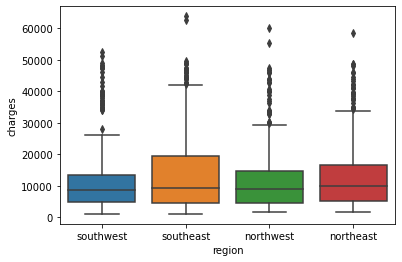

In [118]:
sns.boxplot(x='region', y='charges', data= insurance_data)

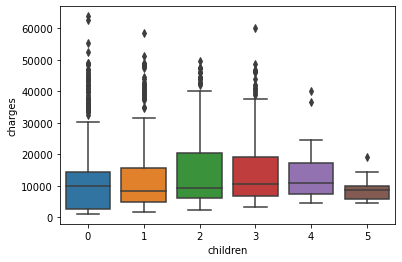

In [119]:
sns.boxplot(x='children', y='charges', data= insurance_data)

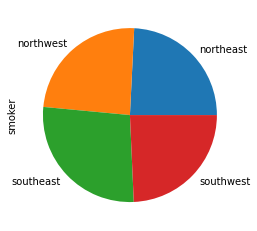

In [131]:
#getting the smokers based on the region graphical representation 
# Pie plot can also be used for various distributions few examples below
insurance_data.groupby('region').count()['smoker'].plot.pie()

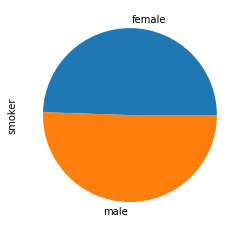

In [133]:
#getting the smokers based on the gender
insurance_data.groupby('sex').count()['smoker'].plot.pie()

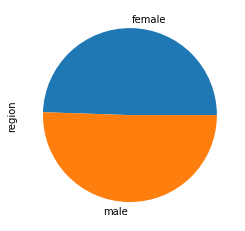

In [134]:
#getting the region based on the gender
insurance_data.groupby('sex').count()['region'].plot.pie()

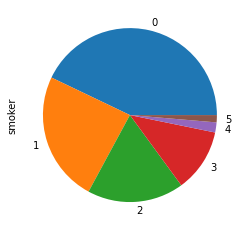

In [137]:
#getting the smokers details based on the number of childre
insurance_data.groupby('children').count()['smoker'].plot.pie()

### i. Pair plot that includes all the columns of the dataframe

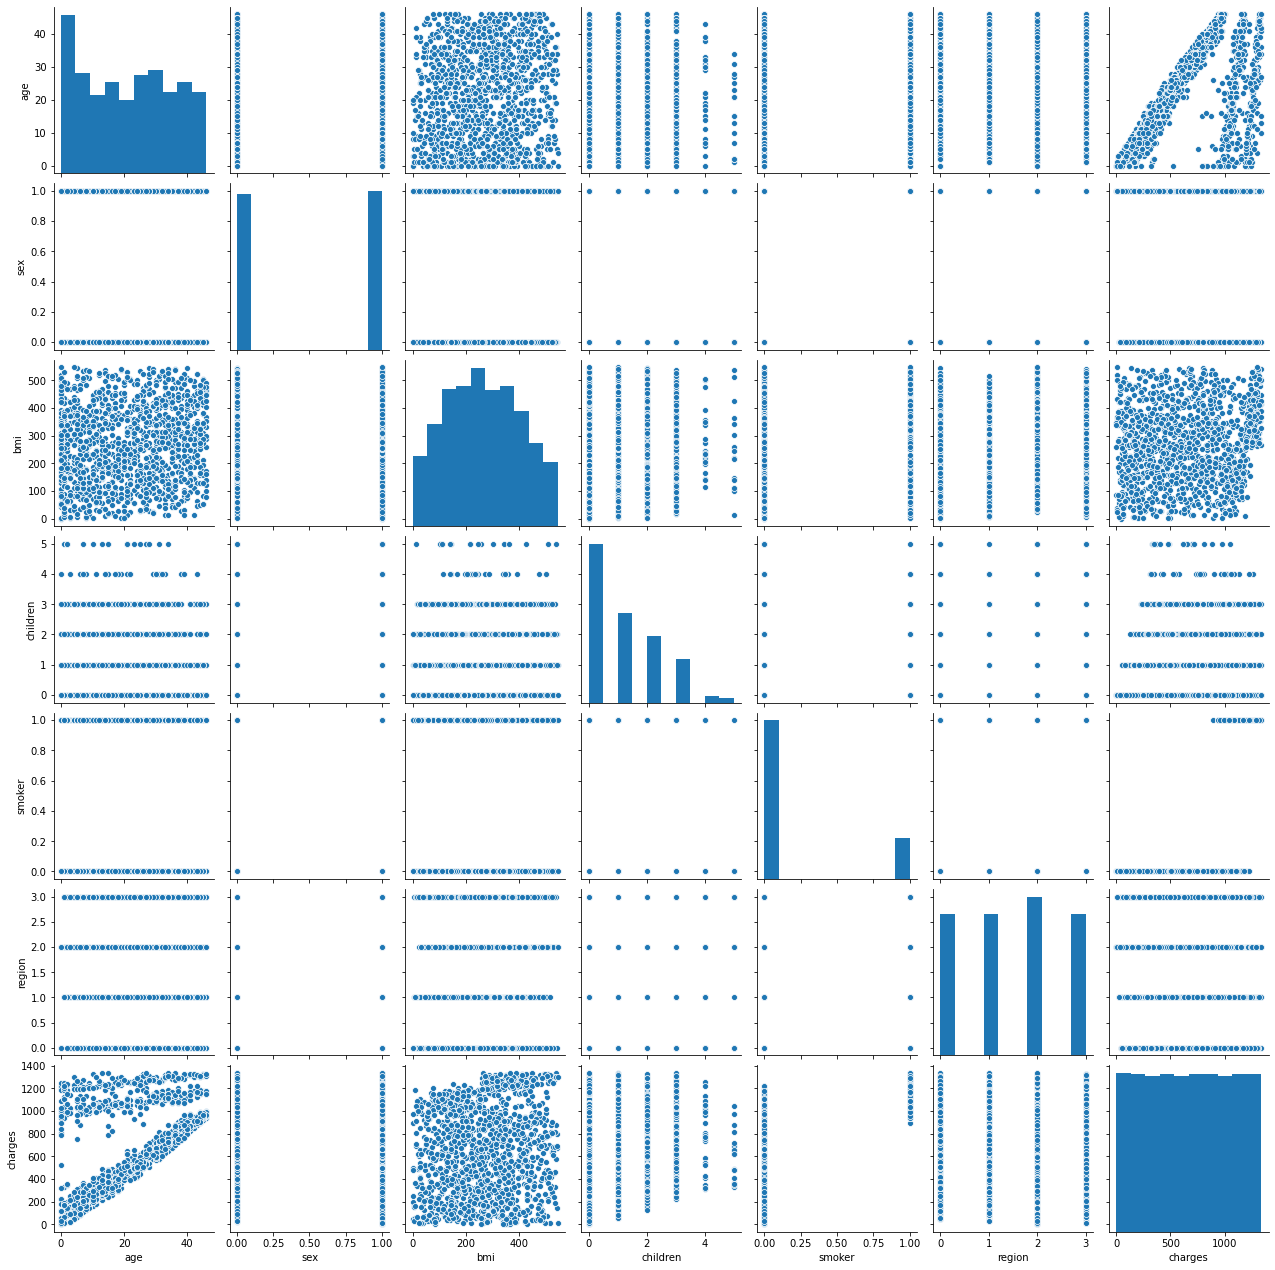

In [126]:
# String values are ignored by the pair plot , perform the label encoding before plotting
columns = ['age','sex','bmi' ,'children','smoker', 'region','charges']
encoded_insurance_data = copy.deepcopy(insurance_data)
encoded_insurance_data.loc[:,columns] = insurance_data.loc[:,columns].apply(LabelEncoder().fit_transform) 
#plot
sns.pairplot(encoded_insurance_data)
plt.show()

The diagonal plots represent distribution of the variable relative to itself. 
The plot between ‘age’ and ‘bmi’ does not indicate any relationship between them. 
The plot is more like a cloud and lacks direction. Between ‘age’ and ‘charges’, there is no clear relationship, though there seem to be 3 lines of positive relationship between them. 
It means, there are 3 sets of charges which increase gradually with age. 
No clear relation between ‘age’ and ‘children’ either. The range of ‘bmi’ decreases as children increases, however there are some extreme values in ‘bmi’ for children value 5. 
There is a little positive relation between ‘bmi’ and ‘charges’, although the plot is a cloud on initial values of ‘charges’. The range of ‘charges’ decreases as the value of ‘children’ increases.


## 4. Answer the following questions with statistical evidence

### a. Do charges of people who smoke differ significantly from the people who don't?

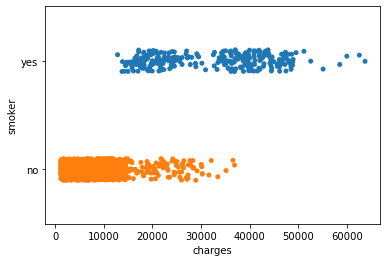

In [8]:
sns.stripplot(insurance_data['charges'], insurance_data['smoker'])

The stripplot() is plotted for smokers and non smokers for charges incurred, From graph its evident that People who smoke have high charges and the people who do not smoke have considerably very low charges. 
So, charges do differ for people who smoke from the people who do not smoke but not significantly 
as there is some intersection of values for both types of people.


In [19]:
# Applying T test to identify if null hypothesis can be accepted or rejected , based on significance level at 5%
# Null Hypothesis
Ho = "Charges of smoker and non-smoker are same"   
# Alternate Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"  

#filter smoker non smoker data
smoker = np.array(insurance_data[insurance_data.smoker == 'yes'].charges) 
non_smoker = np.array(insurance_data[insurance_data.smoker == 'no'].charges)

#Performing an Independent t-test
test, p_value  = stats.ttest_ind(smoker,non_smoker, axis = 0)  


print('pvalue \t' ,p_value)

#significance level at 5%
if p_value < 0.05:  
    print('Charges of smoker and non-smoker are not the same')
else:
    print('Charges of smoker and non-smoker are  same')

pvalue 	 8.271435842177219e-283
Charges of smoker and non-smoker are not the same


### b.Does bmi of males differ significantly from that of females

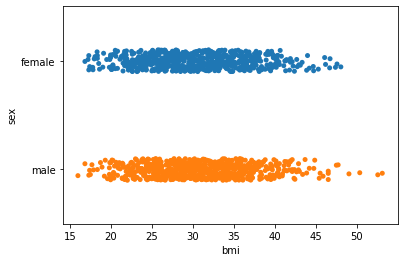

In [12]:
sns.stripplot(insurance_data['bmi'], insurance_data['sex'])

 Not much difference in BMI for male and female observed from stirplot

In [17]:
# Applying T test to identify if null hypothesis can be accepted or rejected , based on significance level at 5%

# Null Hypothesis
Ho = "bmi of males and female are same"  

#Alternate Hypothesis
Ha = "bmi of males and female are not same"   

#filter based on gender values
male = np.array(insurance_data[insurance_data.sex == 'male'].bmi)  
female = np.array(insurance_data[insurance_data.sex == 'female'].bmi) 

#Performing an Independent t-test
t, p_value  = stats.ttest_ind(male,female, axis = 0)  

print('pvalue \t' ,p_value)
if p_value < 0.05:  # Setting our significance level at 5%
    print('bmi of males and female are not same')
else:
    print('bmi of males and female are same')

pvalue 	 0.08997637178984932
bmi of males and female are same


### c.Is the proportion of smokers significantly different in different genders

In [21]:
# Applying Chisquare test to identify if null hypothesis can be accepted or rejected , based on significance level at 5%

# Null Hypothesis
Ho = "proportion of smokers significantly not different in different genders"   

#Alternate Hypothesis
Ha = "proportion of smokers significantly  different in different genders" 

#Creating a table for smokers and non smoker and non smoker
crosstab = pd.crosstab(insurance_data['sex'],insurance_data['smoker']) 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05: 
    print(Ha)
else:
    print(Ho)
crosstab

proportion of smokers significantly  different in different genders


smoker,no,yes
sex,,
female,547,115
male,517,159


### d.Is the distribution of bmi across women with no children, one child and two children, the same

In [22]:
# Applying Anova test to identify if null hypothesis can be accepted or rejected , based on significance level at 5%

# Null Hypothesis
Ho = "No. of children has no effect on bmi"  
# Stating the Alternate Hypothesis
Ha = "No. of children has an effect on bmi"   


female_df = copy.deepcopy(insurance_data[insurance_data['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  
    print(Ha)
else:
    print(Ho)

No. of children has no effect on bmi
